# Insight: According to the Mental Health Services in Australia (MHSA) report from AIHW, 385 per 1,000 individuals in Australia contacted mental health care services in 2018

## Open source code for extracting a  data insight 

This Jupyter notebook demonstrates how to download and analyse the underlying data and extract information about Australian mental health care services in 2018.

<img src="https://images.unsplash.com/photo-1477332552946-cfb384aeaf1c?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=1950&q=80" width ="1200" height=600 >

<span style="font-style:italic;">Photo by <a href="https://unsplash.com/@esdesignisms?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Emma Simpson</a> on <a href="https://unsplash.com/s/photos/mental-health?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>


## The insight generation process is divided into sub-tasks as shown below:

1. Download data
2. Explore data
3. Extract/analyse data
4. Visualize data

## Step 1 : Download data

First, we download a copy of "*Community-mental-health-care-tables-2018-19.xlsx*" from Github (https://github.com/soda-lab/data-registry/) with python code. The data initially published from Mental health services in Australia report by the Australian Institute of Health and Welfare (AIHW) [1]. 

- **Australian Institute of Health and Welfare (AIHW)**: AIHW is a health and welfare statistics agency in Australia. They provide a wide range of health and welfare data.
- **Mental health services in Australia**: provides a picture of the national response of the health and welfare service system to the mental health care needs of Australians. MHSA is updated progressively throughout each year as data becomes available[1].

### Download data with python

In [21]:
import pandas as pd

repository = 'https://github.com/soda-lab/data-registry/'
path = 'blob/main/original_data/'
dataset = 'Community-mental-health-care-tables-2018-19.xlsx'
raw = '?raw=ture'

url = repository + path + dataset + raw
xls = pd.ExcelFile(url)

In [22]:
print(xls.sheet_names)

['Table of contents', 'General information', 'Specific information', 'Table CMHC.1', 'Table CMHC.2', 'Table CMHC.3', 'Table CMHC.4', 'Table CMHC.5', 'Table CMHC.6', 'Table CMHC.7', 'Table CMHC.8', 'Table CMHC.9', 'Table CMHC.10', 'Table CMHC.11', 'Table CMHC.12', 'Table CMHC.13', 'Table CMHC.14', 'Table CMHC.15', 'Table CMHC.16', 'Table CMHC.17', 'Table CMHC.18', 'Table CMHC.19', 'Table CMHC.20', 'Table CMHC.21', 'Table CMHC.22', 'Table CMHC.23', 'Table CMHC.24', 'Table CMHC.25', 'Table CMHC.26', 'Table CMHC.27', 'Table CMHC.28']


Data successfully loaded to the Jupyter notebook. The data includes 33 tables (see above list of tables).

## Step 2: Explore data

Before we start to extract insights from the data, we need to explore the data to identify potential insights. As you can see in the below screenshot, the "Table of Contents" sheet contains brief information about the dataset.  

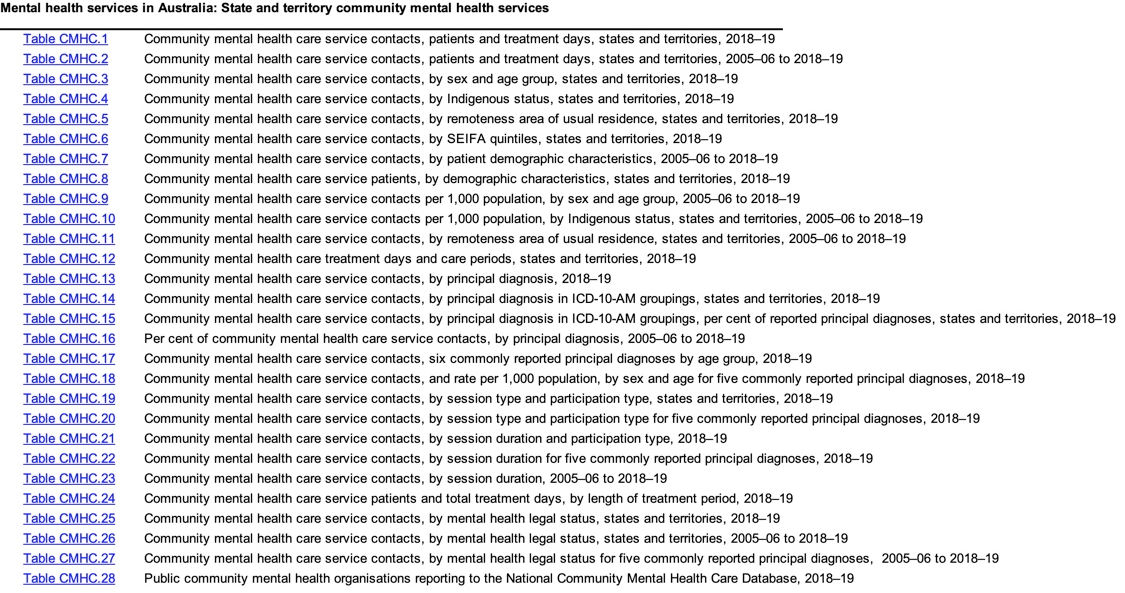

We display rhe first table (Table CMHC.1: Community mental health care service contacts, patients and treatment days, states and territories, 2018–19) below by using python code.

In [23]:
df1 = pd.read_excel(xls, sheet_name = 'Table CMHC.1', skiprows=4, header=0)
df = df1.dropna(subset=['NSW7'], how='all') # drop rows where it contains meaningless values
df

,Count,Unnamed: 1,NSW7,Vic6,Qld,WA,SA,Tas,ACT,NT,Total
0,Number,Service contacts,3.169583e+06,2.323958e+06,2.025116e+06,966266.000000,708056.000000,112748.000000,317659.000000,82599.000000,9.705985e+06
1,Number,Patients,1.380060e+05,7.709300e+04,1.058810e+05,63668.000000,40948.000000,9353.000000,10903.000000,7201.000000,4.530530e+05
2,Number,Treatment daysa,2.286430e+06,1.256465e+06,1.461551e+06,720922.000000,512354.000000,89679.000000,174030.000000,65399.000000,6.566830e+06
3,Number,Average service contacts per patient,2.296699e+01,3.014486e+01,1.912634e+01,15.176635,17.291589,12.054742,29.135009,11.470490,2.142351e+01
4,Number,Average treatment days per patient,1.656761e+01,1.629804e+01,1.380371e+01,11.323145,12.512308,9.588260,15.961662,9.081933,1.449462e+01
6,"Rateb(per 1,000 population)",Service contacts,3.939293e+02,3.560850e+02,4.007887e+02,370.737026,406.288015,212.120129,749.529861,335.967688,3.854605e+02
7,"Rateb(per 1,000 population)",Patients,1.715198e+01,1.181246e+01,2.095480e+01,24.428144,23.496279,17.596406,25.726090,29.289741,1.799241e+01


Table CMHC.1 contains the number of "Service contacts", "Patients", "Treatment days", "Average service contacts per paitent", and "Average treatment days per paitient" as well as Rate(per 1,000 population) of "Service contacts" and "Patients" in state and territory areas between 2018 and 2019.

## Step3: Extract/analyse data

As we interest in comparing the rate of service contacts in different states and territories. We extract 6th rows where "Count" column has "Rateb(per 1.000 population) and "Unnamed:1" column has "Service contacts". The below cell shows how to extract the row with python code.  

In [24]:
extracted_df = pd.DataFrame(columns=['Count'])
for index, row in df.iterrows():
    if row['Count'] == 'Rateb(per 1,000 population)':
        if row['Unnamed: 1'] != 'Patients':
            extracted_df = extracted_df.append(row) 
extracted_df.drop(columns= ['Unnamed: 1'], inplace=True)
extracted_df.rename(columns={"NSW7": "NSW", "Qld": "QLD", "Tas": "TAS", "Vic6":"VIC"}, inplace=True) #rename columns
extracted_df

,Count,ACT,NSW,NT,QLD,SA,TAS,Total,VIC,WA
6,"Rateb(per 1,000 population)",749.529861,393.929334,335.967688,400.788707,406.288015,212.120129,385.460477,356.085035,370.737026


As you can see the above data table shows, ACT has an outstanding rate of mental health care service contact (750 per 1,000 population) while the total rate of mental health care service contact in Australia is 386.

## Step4: Visualize data

Here, we'd like to visualize the extracted tables. Below cells show how to visualize the extracted data by using **Matplot** library.

- **Matplot** : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.



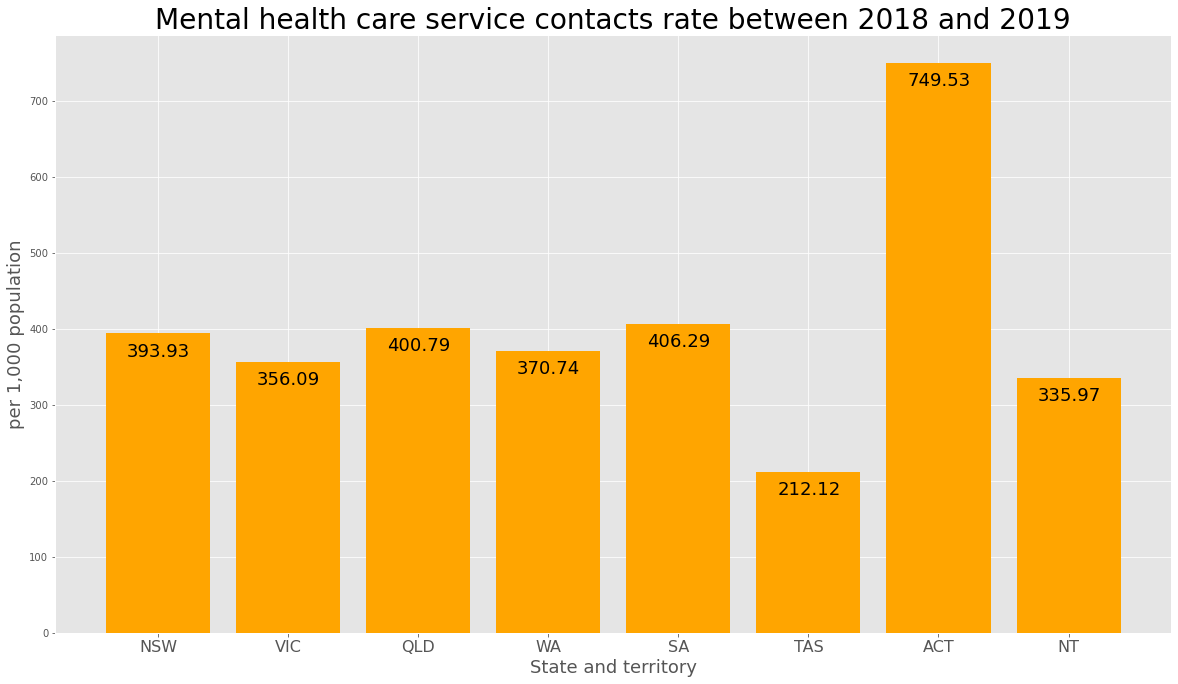

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = ['NSW', 'VIC', 'QLD', 'WA', 'SA', 'TAS', 'ACT', 'NT']
rate = list(extracted_df[['NSW', 'VIC', 'QLD', 'WA', 'SA', 'TAS', 'ACT', 'NT']].iloc[0])

x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(20,11))
plt.bar(x_pos, rate, color='orange')
plt.xlabel("State and territory", fontsize=18)
plt.ylabel("per 1,000 population", fontsize=18)
plt.title("Mental health care service contacts rate between 2018 and 2019", fontsize=28)

for index, value in enumerate(rate):
    plt.text(index - 0.24, value - 30, str(round(value, 2)), fontsize=18)

plt.xticks(x_pos, x, fontsize=16)
plt.show()

The above bar chart shows the rate of mental health service contacts in states and territories in Australia. The x-axis indicates state and territory in Australia, while the y-axis represents the rate of mental health care service contact. According to the figure shows, ACT has the highest rate (759) following by SA (406), QLD (400), NSW (394), WA (371), VIC (356), NT (336), and TAS (212). The total mental health care service contact rate in Australia is 386. 

With these findings, we learned the following insight:


<div style="text-align: center;">
<span style="font-style:italic;font-size:1.2em;"> "According to the Mental Health Services in Australia (MHSA) report from AIHW, 385 per 1,000 individuals in Australia contacted mental health care services in 2018." </span> </div>


# Conclusion

In this Jupyter notebook, we demonstrated how to download a dataset from Github and explore the dataset by using python code. *Mental health services in Australia, State and territory community mental health care 2018-19* data collection contains 33 tables related to mental health service contacts. We used python code to extract tables from the data collection and visualize the data. Finally we learned the data insight **Across Australia 386 individuals in every 1,000 contacted community mental health care services in 2018 - 2019 (AIHW)** from the data collection. 

# References

[1] Australia, Australian Institute of Health and Welfare, *Mental health services in Australia, State and territory community mental health care 2018-19*,  Australian Institute of Health and Welfare, 2020. [Dataset] Available:https://www.aihw.gov.au/reports/mental-health-services/mental-health-services-in-australia/data. [Accessed: January 4, 2021].